In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib


In [3]:
# Load the dataset
df = pd.read_csv("F:/adult.csv")
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [9]:
# Drop rows with missing values represented by '?'
df = df.replace('?', np.nan)
df = df.dropna()

# Reset index after dropping rows
df = df.reset_index(drop=True)

# View cleaned data
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [10]:
# Split features and target
X = df.drop('income', axis=1)
y = df['income']


In [12]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(exclude='object').columns.tolist()

# One-Hot Encode categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_encoded = encoder.fit_transform(X[categorical_cols])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Combine numerical and encoded categorical features
X_final = pd.concat([X[numerical_cols].reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)

# Encode target variable manually
y = y.map({'<=50K': 0, '>50K': 1})


In [13]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)


In [14]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_acc = accuracy_score(y_test, lr_model.predict(X_test))
print("Logistic Regression Accuracy:", lr_acc)


Logistic Regression Accuracy: 0.840906578220011


c:\Users\Praneeth\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_acc = accuracy_score(y_test, svm_model.predict(X_test))
print("SVM Accuracy:", svm_acc)


SVM Accuracy: 0.7948037589828635


In [16]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf_model.predict(X_test))
print("Random Forest Accuracy:", rf_acc)


Random Forest Accuracy: 0.8524046434494196


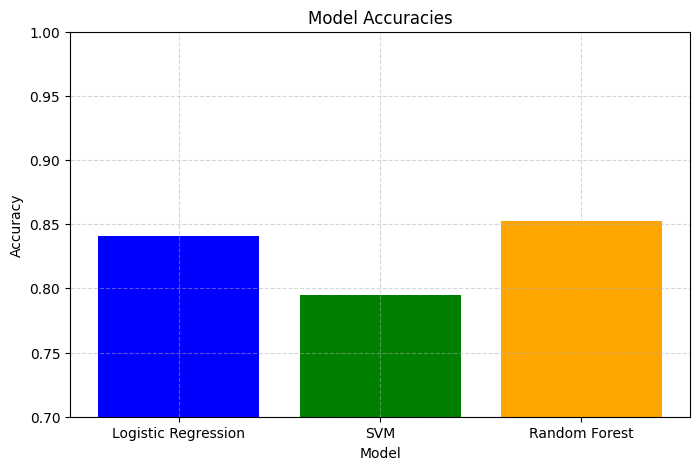

In [17]:
# Compare accuracies
accuracies = {
    'Logistic Regression': lr_acc,
    'SVM': svm_acc,
    'Random Forest': rf_acc
}

# Plot bar graph
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'orange'])
plt.title("Model Accuracies")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1.0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [20]:
# Save the best model using joblib
best_model_name = max(accuracies, key=accuracies.get)
best_model = {
    'Logistic Regression': lr_model,
    'SVM': svm_model,
    'Random Forest': rf_model
}[best_model_name]

joblib.dump((best_model, encoder, X_final.columns.tolist()), "best_model.pkl")
print(f"{best_model_name} saved as best_model.pkl")


Random Forest saved as best_model.pkl


In [21]:
import sklearn
print(sklearn.__version__)

1.7.0
